# Data Exploration

## Ohsumed collection
it includes medical abstracts from the MeSH categories of 
the year 1991. In [Joachims, 1997] were used the first 20,000 documents divided
 in 10,000 for training and 10,000 for testing. The specific task was to categorize 
the 23 cardiovascular diseases categories. After selecting the such category 
subset, the unique abstract number becomes 13,929 (6,286 for training and 
7,643 for testing). As current computers can easily manage larger number of 
documents we make available all 34,389 cardiovascular diseases abstracts 
out of 50,216 medical abstracts contained in the year 1991.

"Bacterial Infections and Mycoses                      C01
Virus Diseases                                        C02
Parasitic Diseases                                    C03
Neoplasms                                             C04
Musculoskeletal Diseases                              C05
Digestive System Diseases                             C06
Stomatognathic Diseases                               C07
Respiratory Tract Diseases                            C08
Otorhinolaryngologic Diseases                         C09
Nervous System Diseases                               C10
Eye Diseases                                          C11
Urologic and Male Genital Diseases                    C12
Female Genital Diseases and Pregnancy Complications   C13
Cardiovascular Diseases                               C14
Hemic and Lymphatic Diseases                          C15
Neonatal Diseases and Abnormalities                   C16
Skin and Connective Tissue Diseases                   C17
Nutritional and Metabolic Diseases                    C18
Endocrine Diseases                                    C19
Immunologic Diseases                                  C20
Disorders of Environmental Origin                     C21
Animal Diseases                                       C22
Pathological Conditions, Signs and Symptoms           C23"

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [2]:
df1 = pd.read_csv('./data-processed/ohsumed-file-category.csv')
doc_num = len(df1)

print('Number of abstracts: {}'.format(doc_num))
df1.head()

Number of abstracts: 34389


,file_name,C01,C02,C03,C04,C05,C06,C07,C08,C09,...,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23
0,48132,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30028,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40951,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5599,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,9166,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Number of abstracts, celectivity vs categories
Selectivity - the proportion of documents to which category(predicate) applies.

Text(0.5,0,'Categories')

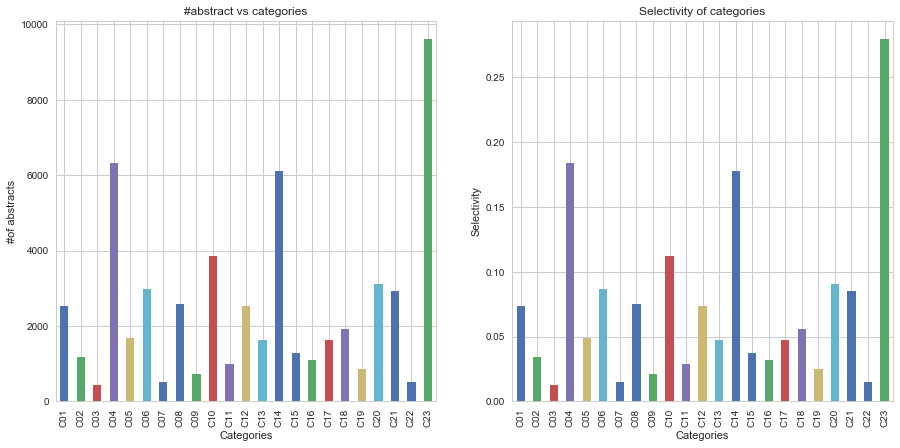

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df1[df1.columns[1:]].sum().plot.bar(ax=axes[0], title='#abstract vs categories')
axes[0].set_ylabel('#of abstracts')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df1[df1.columns[1:]].sum() / doc_num
s.plot.bar(ax=axes[1], title='Selectivity of categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')

## Find abstract describe N categories at the same time

In [6]:
categories = df1.columns[1:]
category_docs = {}
for c in categories:
    category_docs[c] = set(df1['file_name'].loc[df1[c] == 1].values)
    
num_categories = len(categories)
two_categories_docs = np.zeros((num_categories, num_categories))
for ind_c1, c1 in enumerate(categories):
    for ind_c2, c2 in enumerate(categories):
        two_categories_docs[ind_c1, ind_c2] = len(category_docs[c1] & category_docs[c2])    

### Plot heatmap for 2 categories

In [7]:
df2 = pd.DataFrame(two_categories_docs, index=categories, columns=categories)

# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.01, ax=ax)

### Bar chart of number, proportion of abstracts  that describe 2 categories

In [8]:
df3= df2.unstack().sort_values(ascending=False).drop_duplicates()
indexes2 = df3.index.values.tolist()
indexes2_unique = []
for i in indexes2:
    if i[0] != i[1]:
        indexes2_unique.append(i)

Text(0.5,0,'Categories')

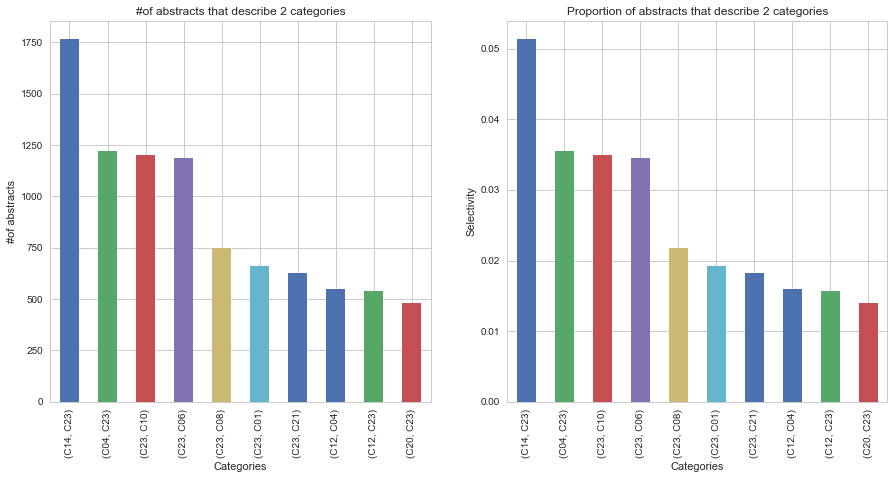

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# plot num of abstracts
df3.loc[indexes2_unique][:10].plot.bar(ax=axes[0], title='#of abstracts that describe 2 categories')
axes[0].set_ylabel('#of abstracts')
axes[0].set_xlabel('Categories')

# plot selectivity
s = df3.loc[indexes2_unique][:10] / doc_num
s.plot.bar(ax=axes[1], title='Proportion of abstracts that describe 2 categories')
axes[1].set_ylabel('Selectivity')
axes[1].set_xlabel('Categories')


### Bar chart of number of documents  that describe 3 categories

In [10]:
indexes3_unrolled = set()
for i in indexes2_unique:    
    indexes3_unrolled.add(i[0])
    indexes3_unrolled.add(i[1])

import itertools
indexes3 = list(itertools.combinations(indexes3_unrolled, 3))
three_categories_docs = []
for c1, c2, c3 in indexes3:
    three_categories_docs.append(len(category_docs[c1] & category_docs[c2] & category_docs[c3]))

Text(0.5,1,'#of abstracts that describe 3 categories')

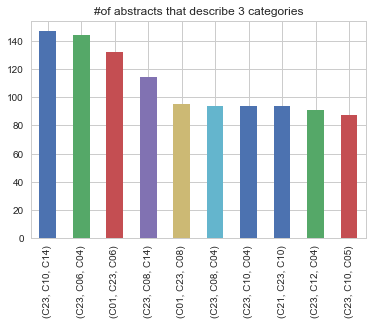

In [11]:
pd.Series(three_categories_docs, indexes3).sort_values(ascending=False)[:10].plot.bar().set_title('#of abstracts that describe 3 categories')